In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


import os
from google.colab import files
uploaded = files.upload()
#print(os.listdir("C:\Users\91982\Documents\ML\MY_240\Project"))

Saving heart.csv to heart.csv


In [ ]:
df =  pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data contains;

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)




**Data Exploration**

In [ ]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

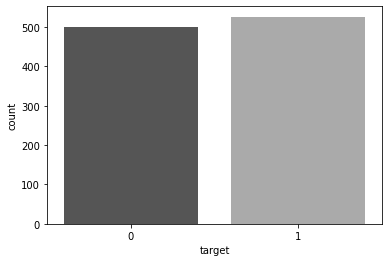

In [ ]:
sns.countplot(x="target", data=df, palette="gray")
plt.show()

In [ ]:
# count no of people with heart disease
# count no of people without heart disease 
countDisease = len(df[df.target == 1])
countNoDisease = len(df[df.target == 0])
print("Percentage of patient that have heart Disease: {:.2f}%".format((countDisease/len(df.target))*100))
print("Percentage of patient that do not have heart Disease: {:.2f}%".format((countNoDisease/len(df.target))*100))


Percentage of patient that have heart Disease: 51.32%
Percentage of patient that do not have heart Disease: 48.68%


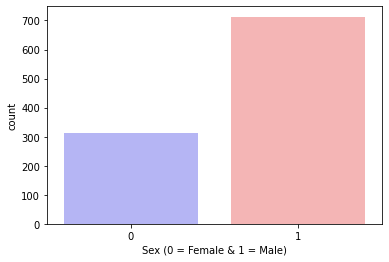

In [ ]:
sns.countplot(x="sex", data=df, palette="bwr")
plt.xlabel("Sex (0 = Female & 1 = Male)")
plt.show()

In [ ]:
male = len(df[df.target == 1])
female = len(df[df.target == 0])
print("Percentage of patient that are male: {:.2f} %".format((male/len(df.sex))*100))
print("Percentage of patient that are female: {:.2f} %".format((female/len(df.sex))*100))


Percentage of patient that are male: 51.32 %
Percentage of patient that are female: 48.68 %


In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


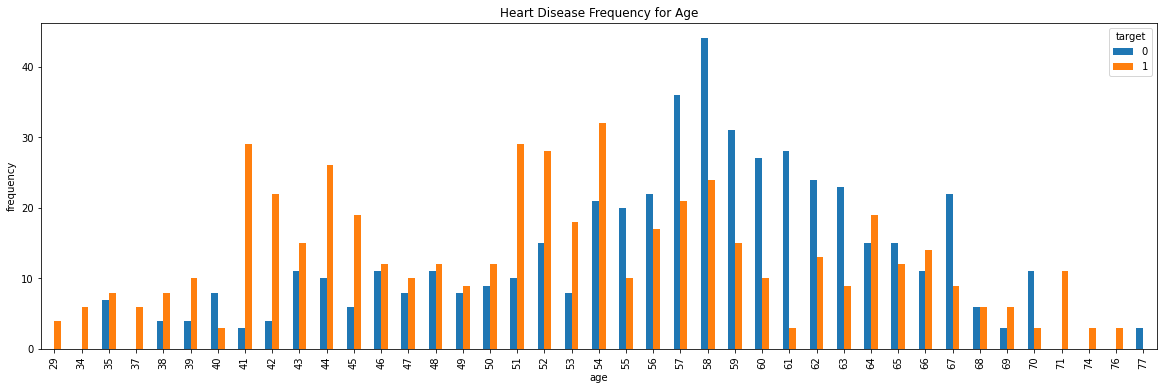

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20,6))
plt.title('Heart Disease Frequency for Age')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

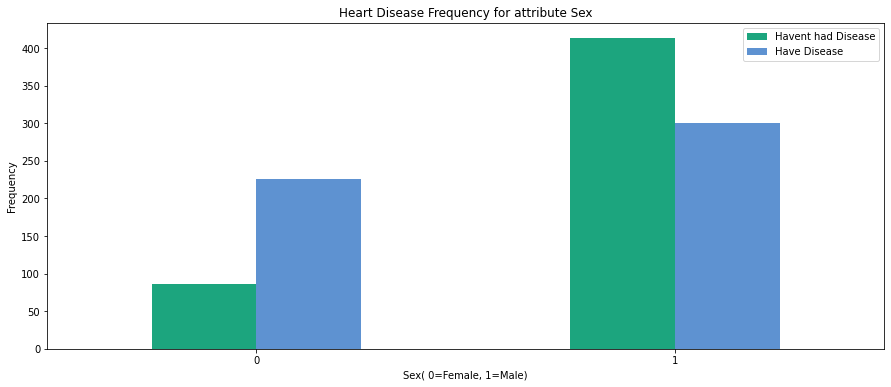

In [ ]:
pd.crosstab(df.sex, df.target).plot(kind="bar", figsize=(15,6), color=['#1ca57e','#5e92d1'])
plt.title('Heart Disease Frequency for attribute Sex')
plt.xlabel('Sex( 0=Female, 1=Male)')
plt.ylabel('Frequency')
plt.legend(['Havent had Disease', 'Have Disease'])
plt.xticks(rotation = 0)
plt.show()

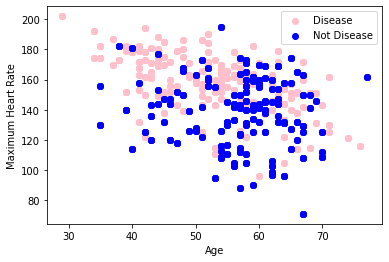

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[df.target==1], c='pink')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="blue")
plt.legend(['Disease','Not Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

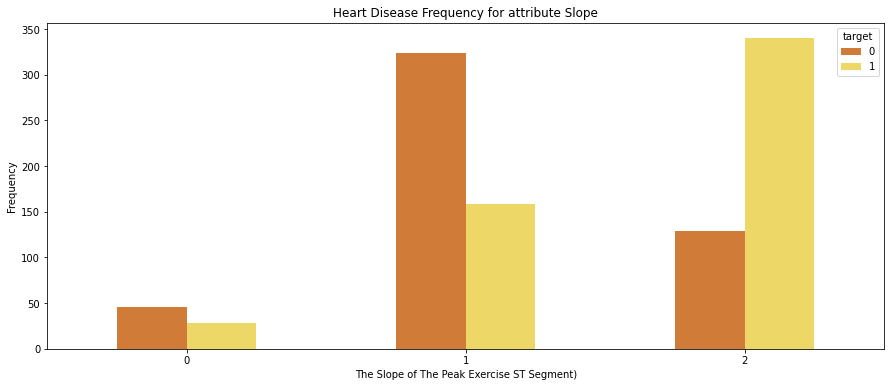

In [ ]:
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize=(15,6), color=['#d17b38','#edd766'])
plt.title('Heart Disease Frequency for attribute Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment)')
plt.ylabel('Frequency')

plt.xticks(rotation = 0)
plt.show()

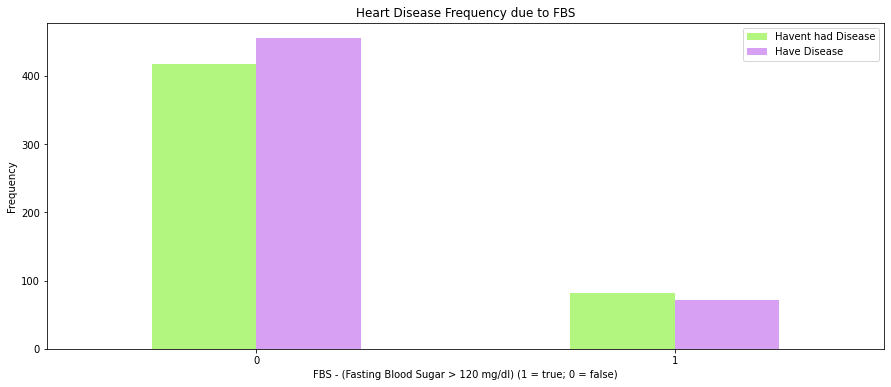

In [ ]:
pd.crosstab(df.fbs, df.target).plot(kind="bar", figsize=(15,6), color=['#b2f57f','#d8a0f2'])
plt.title('Heart Disease Frequency due to FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.ylabel('Frequency')
plt.legend(['Havent had Disease', 'Have Disease'])
plt.xticks(rotation = 0)
plt.show()

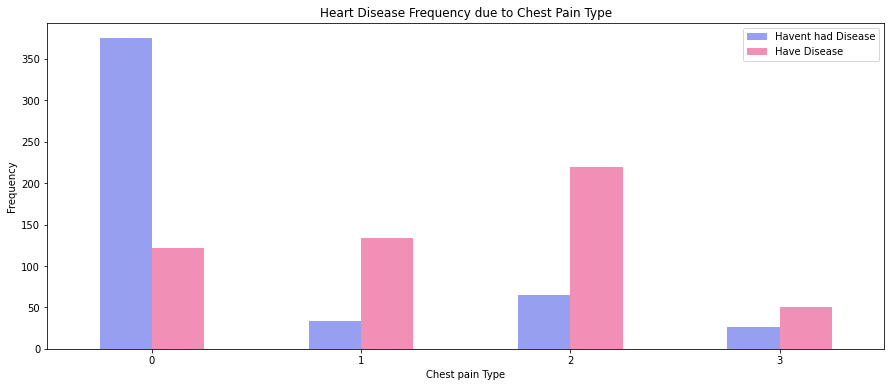

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(15,6), color=['#97a0f0','#f28fb7'])
plt.title('Heart Disease Frequency due to Chest Pain Type')
plt.xlabel('Chest pain Type')
plt.ylabel('Frequency')
plt.legend(['Havent had Disease', 'Have Disease'])
plt.xticks(rotation = 0)
plt.show()

**Creating dummy variables**

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [ ]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [ ]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


**Creating Model for Logistic Regression**

We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.



In [ ]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

Normalize Data



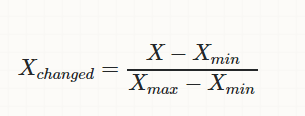

In [ ]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

Let's say weight = 0.01 and bias = 0.0

In [ ]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

Sigmoid Function


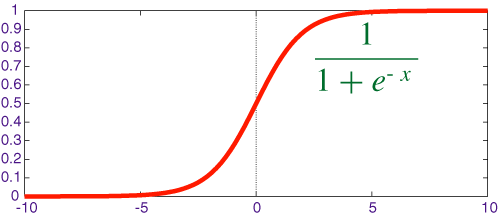


In [ ]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

Forward and Backward Propagation

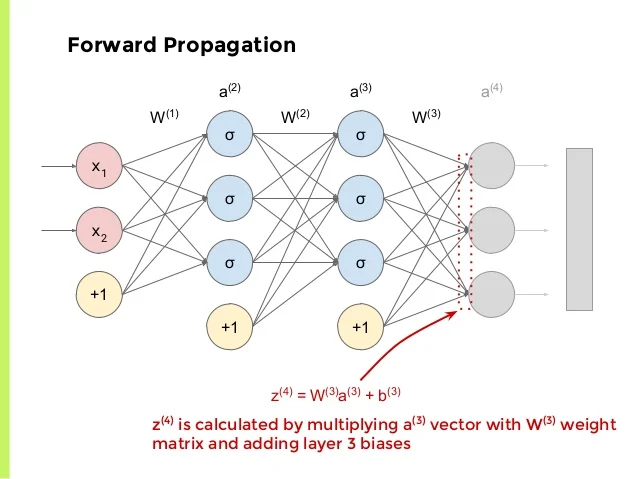

Cost Function

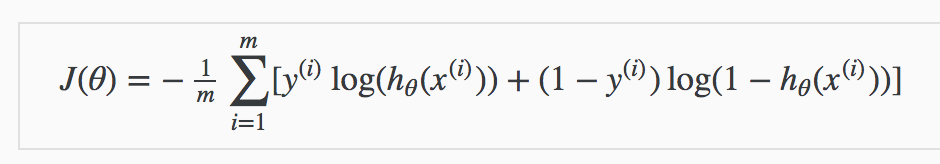


Gradient Descent 

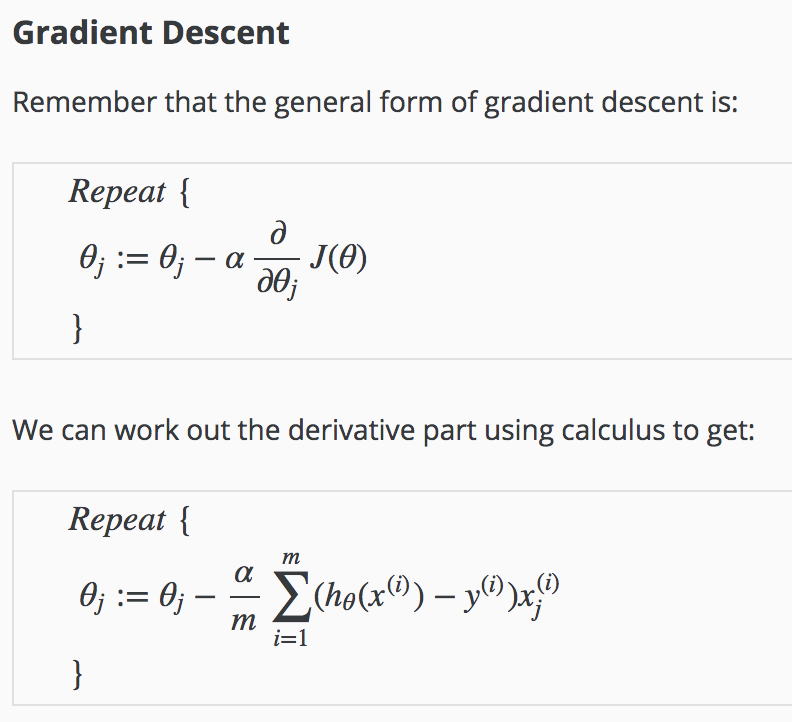

By the way in formulas;

h0(x^i)= y_head
y^i = y_train
x^i = x_train

In [ ]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [ ]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}

        
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients


In [ ]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [ ]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manual Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.37214880873836975


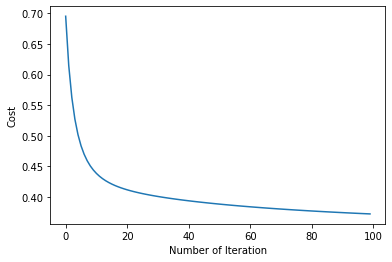

Manual Test Accuracy: 86.34%


In [ ]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [ ]:
accuracies = {}
import sklearn
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100
predictions = lr.predict(x_test.T)
print(sklearn.metrics.classification_report(y_test.T, predictions))

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

              precision    recall  f1-score   support

           0       0.89      0.81      0.84        98
           1       0.84      0.91      0.87       107

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205

Test Accuracy 85.85%


**KNN** **Classification**

In [ ]:
# KNN Model
import sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)
print(sklearn.metrics.classification_report(y_test.T, prediction))

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        98
           1       0.88      0.92      0.90       107

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

2 NN Score: 89.27%


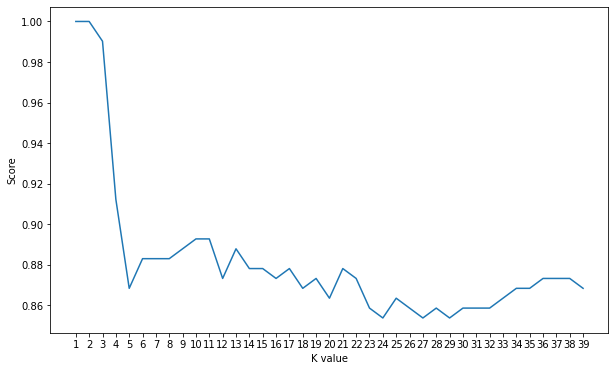

Maximum KNN Score is 100.00%


In [ ]:
# try ro find best k value
from matplotlib.pyplot import figure

figure(figsize=(10, 6))
scoreList = []
for i in range(1,40):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,40), scoreList)
plt.xticks(np.arange(1,40,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

**SVM** **Algorithm**

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
x_test_new = x_test.T
predictions = svm.predict(x_test_new)
print(sklearn.metrics.classification_report(y_test.T, predictions))

accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))
# print(sklearn.metrics.classification_report(y_test.T, prediction))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        98
           1       0.93      0.91      0.92       107

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205

Test Accuracy of SVM Algorithm: 91.71%


**Comparing** **Models**

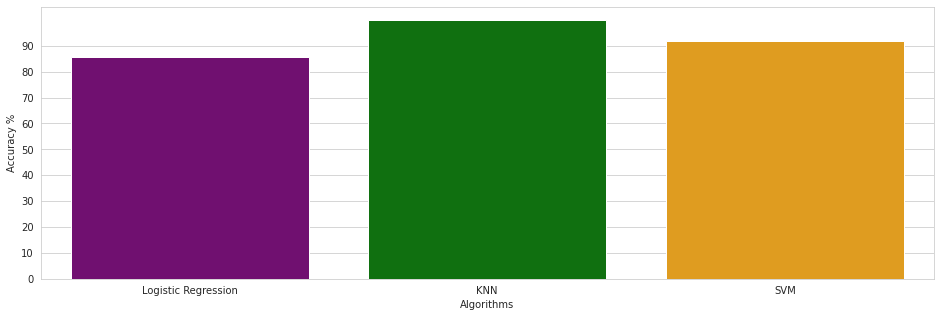

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

**Confusion** **Matrix** 

In [ ]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 32)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)


In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)


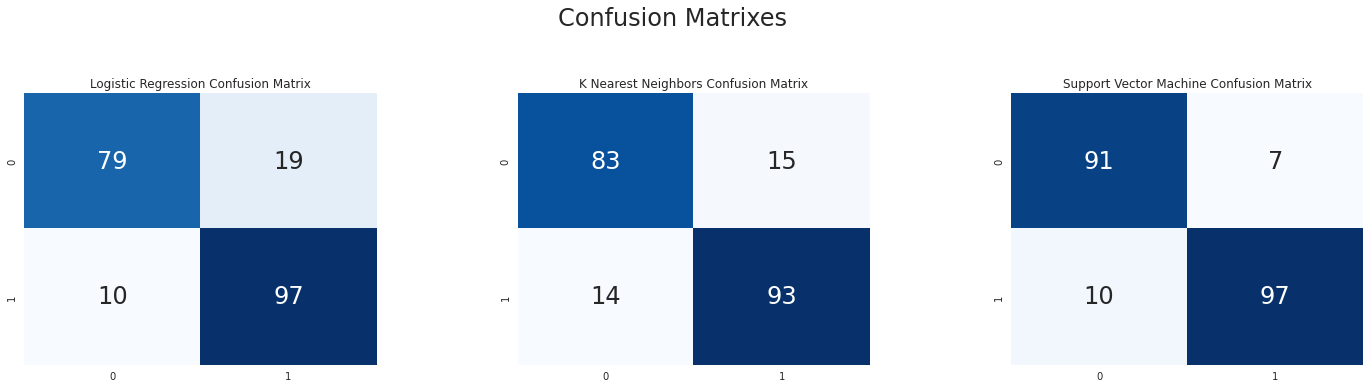

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()